In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import warnings


In [2]:
warnings.filterwarnings("ignore")
# Load data
data = pd.read_csv("./data/repair_notes.csv")

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['notes'], data['category'], test_size=0.2, random_state=42)

# Create a model pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [3]:
# Evaluate the model
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

                     precision    recall  f1-score   support

         Brake Work       0.00      0.00      0.00         1
         Electrical       1.00      1.00      1.00         1
      Engine Repair       0.00      0.00      0.00         0
               HVAC       0.00      0.00      0.00         1
Routine Maintenance       1.00      1.00      1.00         1

           accuracy                           0.50         4
          macro avg       0.40      0.40      0.40         4
       weighted avg       0.50      0.50      0.50         4



Fontconfig warning: ignoring UTF-8: not a valid region tag


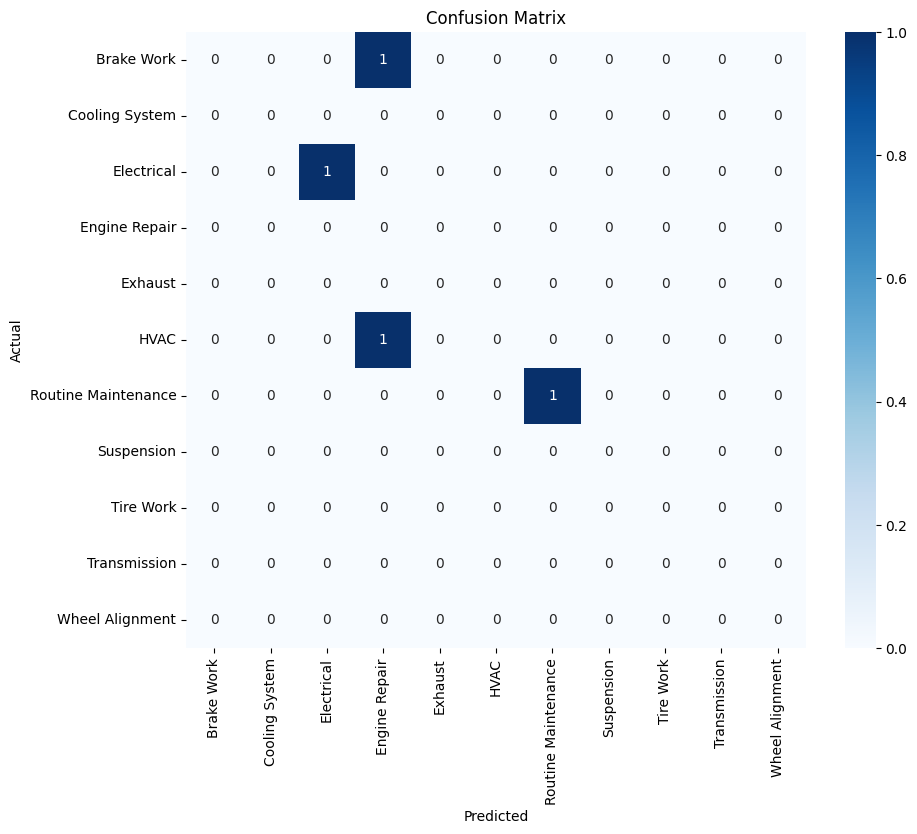

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, categories, title='Confusion Matrix'):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=categories)
    
    # Convert confusion matrix to DataFrame
    cm_df = pd.DataFrame(cm, index=categories, columns=categories)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Example usage in your existing code after model evaluation
predicted = model.predict(X_test)
categories = sorted(data['category'].unique())
plot_confusion_matrix(y_test, predicted, categories)


In [4]:
# Function to predict category of new repair notes
def predict_category(note):
    return model.predict([note])[0]

# Example usage
example_note = "Replace brake pads"
print("The category of the repair is:", predict_category(example_note))

The category of the repair is: Engine Repair


In [6]:
# Example usage
example_note = "Car is leaking oil under the hood"
print("The category of the repair is:", predict_category(example_note))

The category of the repair is: Engine Repair


In [7]:
# Example usage
example_note = "Car is making noise when I try to stop"
print("The category of the repair is:", predict_category(example_note))

The category of the repair is: Engine Repair
